# Laboratorio 6 – Clasificación de malware con DL

In [53]:
#Imports
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import collections
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [10]:
#Montaje de google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##PARTE 1

In [11]:
batch_size = 32
img_height = 128
img_width = 128

In [12]:
DATA_DIRECTORY = '/content/drive/MyDrive/B'

In [13]:
#Keras API
dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.


In [14]:
#Clases 
class_names = dataset.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


In [51]:
def get_class_distribution(dataset):
    class_distribution = {}
    for element in dataset.as_numpy_iterator():
        label = element[1][0]

        try:
            class_distribution[label] += 1
        except:
            class_distribution[label] = 0

    class_distribution = collections.OrderedDict(sorted(class_distribution.items())) 
    return class_distribution

In [ ]:
class_distribution = get_class_distribution(dataset)

In [52]:
#Distribucion por clases de img
for i in range(len(class_names)):
    name = class_names[i]
    dist = class_distribution[i]
    print(name, " " * (15 - len(name)), dist)

Adialer.C        4
Agent.FYI        1
Allaple.A        82
Allaple.L        49
Alueron.gen!J    9
Autorun.K        4
C2LOP.P          5
C2LOP.gen!g      4
Dialplatform.B   3
Dontovo.A        3
Fakerean         8
Instantaccess    17
Lolyda.AA1       7
Lolyda.AA2       1
Lolyda.AA3       1
Lolyda.AT        9
Malex.gen!J      7
Obfuscator.AD    1
Rbot!gen         2
Skintrim.N       4
Swizzor.gen!E    8
Swizzor.gen!I    4
VB.AT            12
Wintrim.BX       2
Yuner.A          20


##PARTE 2

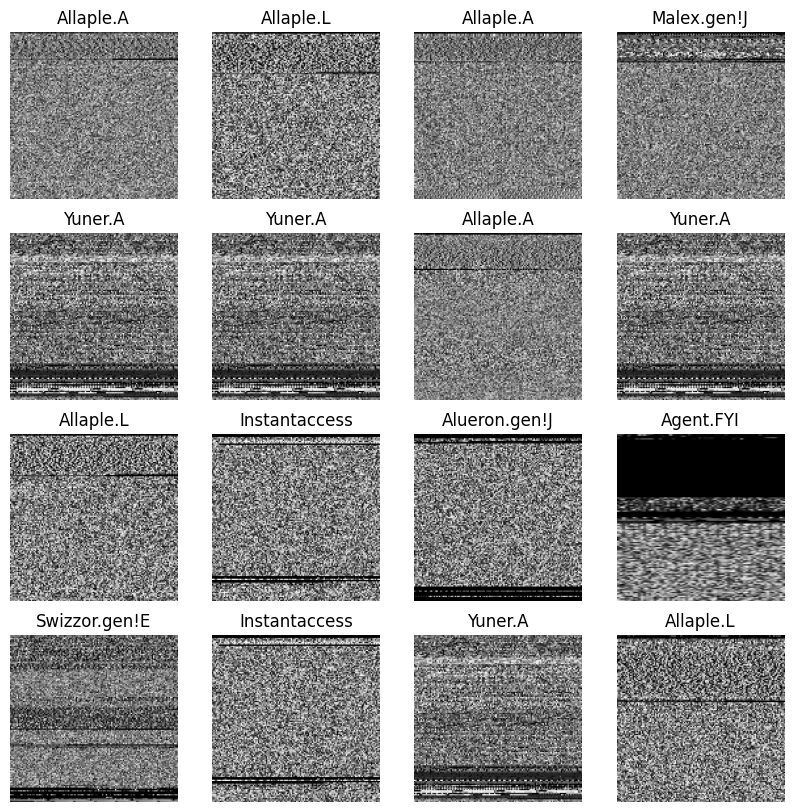

In [54]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##PARTE 3

In [19]:
path_images = ImageDataGenerator().flow_from_directory(directory=DATA_DIRECTORY, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [20]:
images, marks = next(path_images)

In [21]:
indices_path = path_images.class_indices

In [22]:
type_images = indices_path.keys()

In [23]:
for x in marks.shape:
    print(x)

9339
25


In [24]:
add = sum(marks)
marks_qt = marks.shape[0]

In [25]:
quantity = ((add)/marks_qt)

In [55]:
#Red neuronal
quantity = quantity*100
quantity

array([ 130.63496,  124.21031, 3157.7258 , 1703.6085 ,  212.01413,
        113.50252,  156.33365,  214.1557 ,  189.5278 ,  173.46611,
        407.9666 ,  461.5055 ,  228.07582,  197.02322,  131.70575,
        170.25378,  145.62589,  152.05054,  169.183  ,   85.66228,
        137.05965,  141.34276,  436.87762,  103.8655 ,  856.6228 ],
      dtype=float32)

In [27]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

##PARTE 4

In [28]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy', 'MeanSquaredError']
)

In [56]:
#Model resume
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 128)      

##PARTE 5

In [30]:
X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [31]:
#Datasets de train de X
X_train.shape
X_train.size

321306624

In [32]:
#Dataset de test de X
X_test.shape
X_test.size

137723904

In [33]:
#Dataset de train de Y
y_train.shape
y_train.size

163425

In [34]:
#Dataset de test de Y
y_test.shape
y_test.size

70050

##PARTE 6

In [35]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 128)      

In [37]:
model.layers

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [39]:
op = model.evaluate(X_test, y_test)
print("Accuracy ", op[1])

88/88 [==============================] - 71s 796ms/step - loss: 3.1726 - accuracy: 0.0203
Accuracy  0.020342612639069557


In [40]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
205/205 [==============================] - 740s 4s/step - loss: 0.7614 - accuracy: 0.8045 - val_loss: 0.8127 - val_accuracy: 0.9226
Epoch 2/4
205/205 [==============================] - 712s 3s/step - loss: 0.1469 - accuracy: 0.9575 - val_loss: 0.2084 - val_accuracy: 0.9565
Epoch 3/4
205/205 [==============================] - 728s 4s/step - loss: 0.0696 - accuracy: 0.9792 - val_loss: 0.1372 - val_accuracy: 0.9582
Epoch 4/4
205/205 [==============================] - 734s 4s/step - loss: 0.0493 - accuracy: 0.9858 - val_loss: 0.1188 - val_accuracy: 0.9643


In [41]:
type_images

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [42]:
y_pred=model.predict(X_test)

88/88 [==============================] - 71s 800ms/step


In [43]:
test_predict = np.argmax(model.predict(X_test), axis=-1)

88/88 [==============================] - 73s 820ms/step


In [44]:
target_test = np.argmax(y_test, axis=-1)

In [49]:
cm = confusion_matrix(target_test, test_predict)
cm

array([[ 35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 872,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 476,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  63,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  36],
       [  0,   0,   0,   0,   0,   0,  47,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   2,   0,   0,   0],
      

In [47]:
print(classification_report(test_predict, target_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00       872
           3       1.00      0.99      1.00       479
           4       1.00      1.00      1.00        63
           5       0.00      0.00      0.00         0
           6       0.90      0.70      0.79        67
           7       0.75      0.93      0.83        58
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        50
          10       0.99      1.00      1.00       114
          11       1.00      1.00      1.00       115
          12       1.00      1.00      1.00        58
          13       1.00      1.00      1.00        60
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        44
          16       1.00      0.94      0.97        34
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
